In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

In [6]:
df = pd.read_csv(r"C:\Users\jagad\Desktop\Dataset\IBM HR Analytics.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.shape

(1470, 35)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [9]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

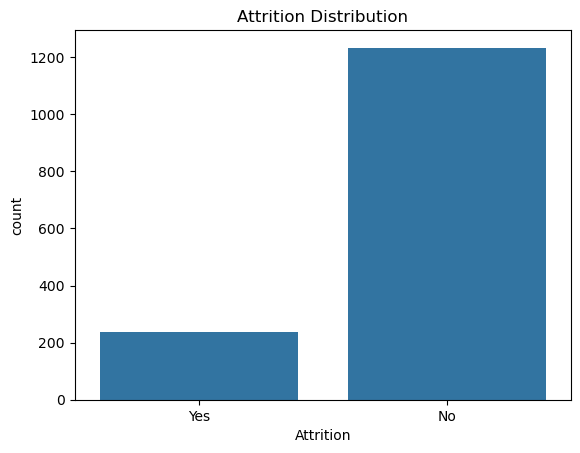

In [10]:
#Attrition Distribution 
sns.countplot(x='Attrition', data=df)
plt.title("Attrition Distribution")
plt.show()

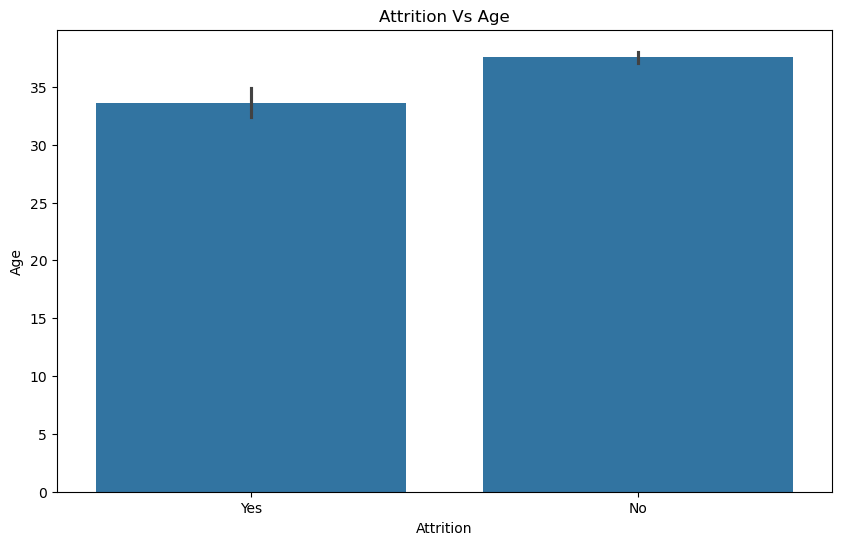

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(x='Attrition', y='Age', data=df)
plt.title('Attrition Vs Age')
plt.show()

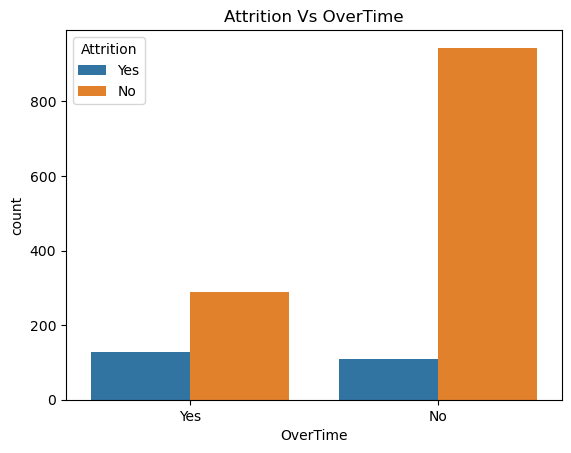

In [17]:
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition Vs OverTime")
plt.show()

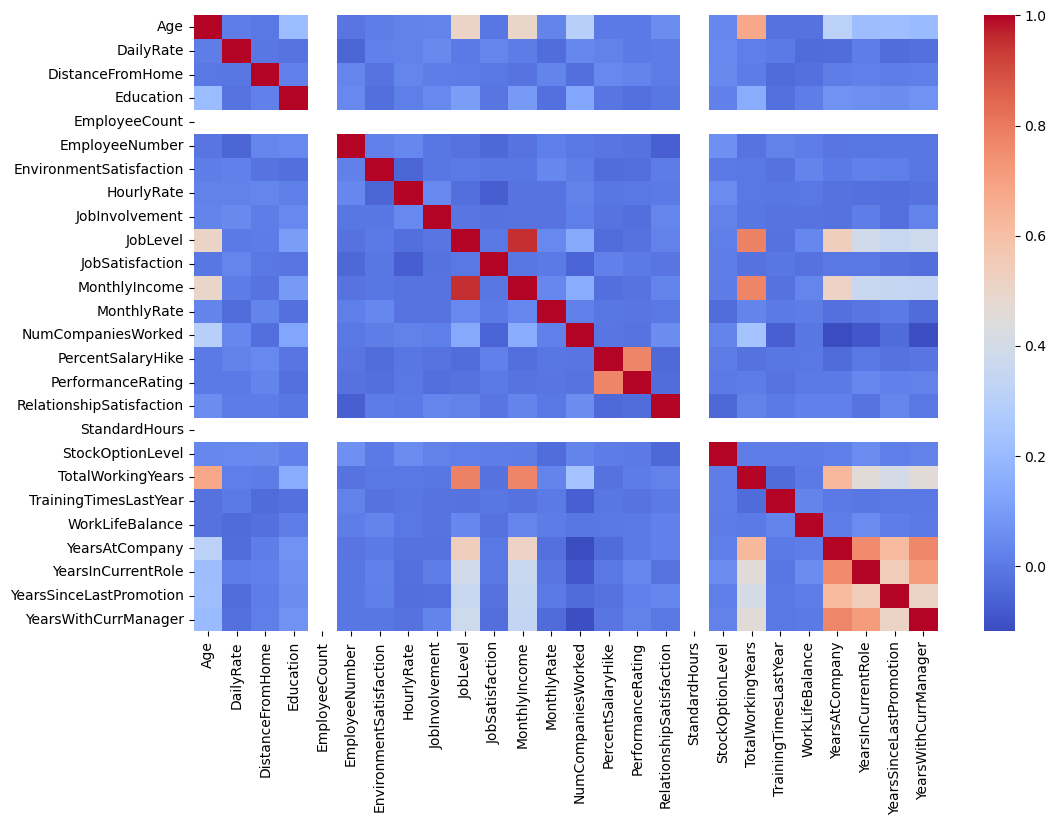

In [20]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), cmap='coolwarm')
plt.show()

# Data preprocessing

In [21]:
#Convert Yes to 1 & No to 0
df['Attrition'] = df['Attrition'].map({'Yes':1, 'No':0})

In [22]:
#Dropping Useless Column
df = df.drop(['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours'], axis=1)

In [26]:
#Separating Features & target

#For Attrition Model
X_class = df.drop(["Attrition", 'MonthlyIncome'], axis=1)
y_class = df['Attrition']

#For Salary Model
X_reg = df.drop(['MonthlyIncome', 'Attrition'], axis=1)
y_reg = df['MonthlyIncome']

In [27]:
#Encoding Categorical Variables
X_class = pd.get_dummies(X_class, drop_first=True)
X_reg = pd.get_dummies(X_reg, drop_first=True)

# Attrition Model Building

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)

# Model Training using Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [32]:
model_class = RandomForestClassifier()
model_class.fit(X_train, y_train)
y_pred = model_class.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8741496598639455
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       255
           1       0.67      0.10      0.18        39

    accuracy                           0.87       294
   macro avg       0.77      0.55      0.55       294
weighted avg       0.85      0.87      0.83       294



# Salary Model Building 

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [34]:
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

# Model Training using Random Forest Regressor

In [40]:
model_reg = RandomForestRegressor()
model_reg.fit(X_train_r, y_train_r)

y_pred_r = model_reg.predict(X_test_r)

In [42]:
mae = mean_absolute_error(y_test_r, y_pred_r)
rmse = np.sqrt(mean_squared_error(y_test_r, y_pred_r))

print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", model_reg.score(X_test_r, y_test_r))


MAE: 821.0184013605441
RMSE: 1104.145077165239
R2 Score: 0.9442180940220934


In [43]:
print(y_test_r[:5])
print(y_pred_r[:5])

1041    8463
184     4450
1222    1555
67      9724
220     5914
Name: MonthlyIncome, dtype: int64
[ 6298.47  3949.04  2059.16 10473.51  3977.9 ]


In [45]:
import joblib

joblib.dump(model_class, 'attrition_model.pkl')
joblib.dump(model_reg, 'salary_model.pkl')

['salary_model.pkl']

In [47]:
# Save feature columns
joblib.dump(X_class.columns.tolist(), "class_columns.pkl")
joblib.dump(X_reg.columns.tolist(), "reg_columns.pkl")

['reg_columns.pkl']